In [165]:
from ucimlrepo import fetch_ucirepo
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, rand_score
from sklearn.decomposition import PCA

In [2]:
iris_dataset = load_iris(as_frame=True).frame
iris_dataset.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [3]:
columns = [
    'area', 'perimeter', 'compactness', 'length_of_kernel',
    'width_of_kernel', 'asymmetry_coefficient', 'length_of_kernel_groove',
    'class'
]
seeds = pd.read_csv("./data/raw/seeds_dataset.txt", names=columns, sep='\s+')
seeds.head()

<>:6: SyntaxWarning: invalid escape sequence '\s'
<>:6: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_52079/1951453391.py:6: SyntaxWarning: invalid escape sequence '\s'
  seeds = pd.read_csv("./data/raw/seeds_dataset.txt", names=columns, sep='\s+')


,area,perimeter,compactness,length_of_kernel,width_of_kernel,asymmetry_coefficient,length_of_kernel_groove,class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [156]:
seeds.shape

(210, 8)

In [4]:
glass = fetch_ucirepo(id=42)
glass_dataset = pd.concat([glass.data.features, glass.data.targets], axis=1)
glass_dataset.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type_of_glass
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [155]:
glass_dataset.shape

(214, 10)

# Sanity check

In [23]:
X_iris = iris_dataset.iloc[:, :-1]
y_iris = iris_dataset.iloc[:, -1]
X_seeds = seeds.iloc[:, :-1]
y_seeds = seeds.iloc[:, -1]
X_glass = glass_dataset.iloc[:, :-1]
y_glass = glass_dataset.iloc[:, -1]

In [20]:
model = KMeans(n_clusters=3)
model.fit(X_iris)
model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [21]:
pred = model.predict(X_iris)
score_labeled = rand_score(y_iris, pred)
score_unlabeled = silhouette_score(X_iris, pred)

/home/mindflayer77/miniconda3/envs/um-lab/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


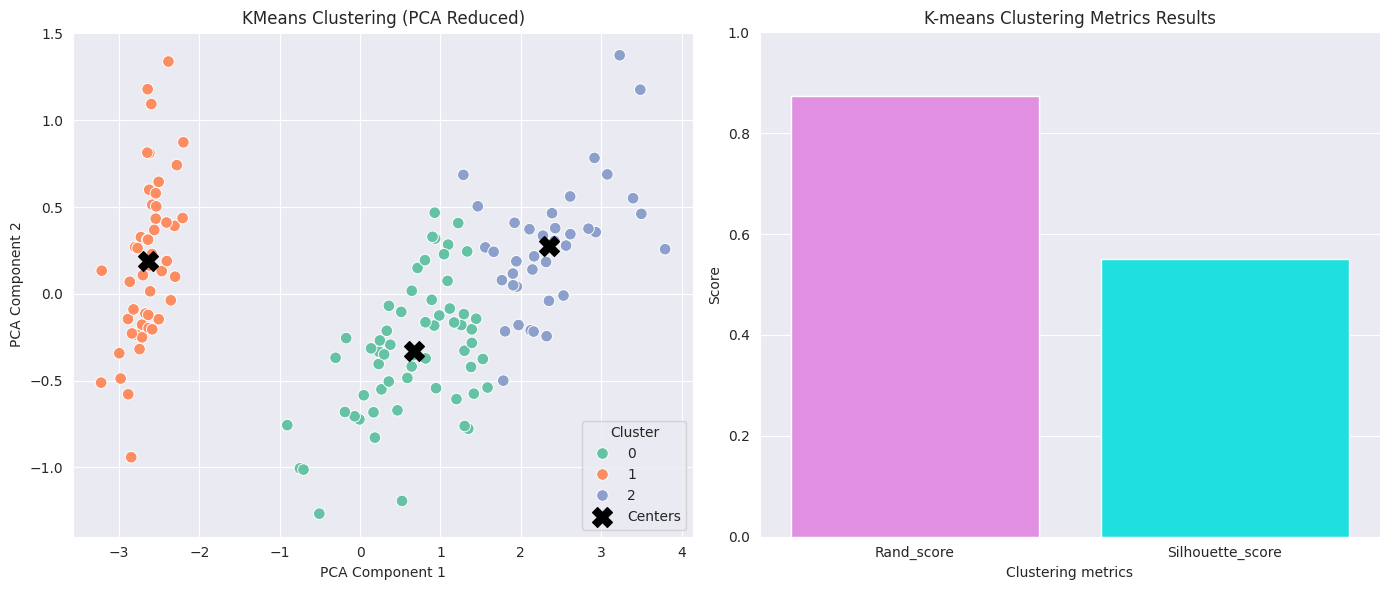

In [22]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_iris)
centers_pca = pca.transform(model.cluster_centers_)

data = pd.DataFrame({
    'Metric': ['Rand_score', 'Silhouette_score'],
    'Score': [score_labeled, score_unlabeled]
})

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.scatterplot(ax=axes[0], x=X_pca[:, 0], y=X_pca[:, 1], hue=model.labels_, palette='Set2', s=70)
axes[0].scatter(centers_pca[:, 0], centers_pca[:, 1], c='black', s=200, marker='X', label='Centers')
axes[0].set_title('KMeans Clustering (PCA Reduced)')
axes[0].set_xlabel('PCA Component 1')
axes[0].set_ylabel('PCA Component 2')
axes[0].legend(title='Cluster')

sns.barplot(ax=axes[1], data=data, x='Metric', y='Score', hue='Metric', palette=['violet', 'cyan'], legend=False)
axes[1].set_title('K-means Clustering Metrics Results')
axes[1].set_ylim(0, 1)
axes[1].set_xlabel('Clustering metrics')
axes[1].set_ylabel('Score')

plt.tight_layout()
plt.show()


In [74]:
def plot_boxplots(df, param_col='n_clusters', dataset_col='Dataset', metric_col='Metric', score_col='Score'):
    fig, axes = plt.subplots(1, 2, figsize=(18, 6), sharey=False)

    sns.boxplot(
        data=df[df[dataset_col] == 'Glass'],
        x=param_col,
        y=score_col,
        hue=metric_col,
        ax=axes[0],
        palette='Set2'
    )
    axes[0].set_title('Clustering Scores for Glass Dataset')
    axes[0].set_xlabel(param_col.replace('_', ' ').title())
    axes[0].set_ylabel('Score')

    sns.boxplot(
        data=df[df[dataset_col] == 'Seeds'],
        x=param_col,
        y=score_col,
        hue=metric_col,
        ax=axes[1],
        palette='Set2'
    )
    axes[1].set_title('Clustering Scores for Seeds Dataset')
    axes[1].set_xlabel(param_col.replace('_', ' ').title())
    axes[1].set_ylabel('')

    plt.tight_layout()
    plt.show()


In [347]:
def visualize_clustering_param(X, param_values):
    X = X.to_numpy() if hasattr(X, "to_numpy") else X
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)

    n_params = len(param_values)
    cols = 4
    rows = (n_params + cols - 1) // cols

    fig, axes = plt.subplots(rows, cols, figsize=(5 * cols, 4 * rows))
    axes = axes.flatten()

    palette = sns.color_palette('tab10', max(param_values))

    for i, param_val in enumerate(param_values):
        km = KMeans(n_clusters=param_val, n_init=10)
        labels = km.fit_predict(X)
        centers_pca = pca.transform(km.cluster_centers_)

        sorted_labels = np.argsort(np.bincount(labels))[::-1]
        label_map = {orig: new for new, orig in enumerate(sorted_labels)}
        mapped_labels = np.array([label_map[label] for label in labels])

        sns.scatterplot(
            x=X_pca[:, 0], y=X_pca[:, 1], hue=mapped_labels,
            palette=palette[:param_val], ax=axes[i], legend=None, s=50
        )

        sns.scatterplot(x=centers_pca[:, 0], y=centers_pca[:, 1],
                        c='black', s=100, marker='X', ax=axes[i], legend=None)

        axes[i].set_title(f"n_clusters = {param_val}")
        axes[i].set_xlabel('PCA Component 1')
        axes[i].set_ylabel('PCA Component 2')
        axes[i].set_xticks([])
        axes[i].set_yticks([])

    plt.tight_layout()
    plt.show()

In [484]:
def visualize_param_for_dataset(X, param_values, param_name, n_clusters=8, title_prefix=""):
    X = X.to_numpy() if hasattr(X, "to_numpy") else X
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)

    n_params = len(param_values)
    cols = 4
    rows = (n_params + cols - 1) // cols

    fig, axes = plt.subplots(rows, cols, figsize=(5 * cols, 4 * rows))
    axes = axes.flatten()

    palette = sns.color_palette('tab10', n_clusters)

    for i, val in enumerate(param_values):
        try:
            km = KMeans(n_clusters=n_clusters, **{param_name: val})
            labels = km.fit_predict(X)
            centers_pca = pca.transform(km.cluster_centers_)
            unique_labels = np.unique(labels)
            label_to_color = {label: idx for idx, label in enumerate(sorted(unique_labels))}
            mapped_labels = np.array([label_to_color[label] for label in labels])

            sns.scatterplot(
                x=X_pca[:, 0], y=X_pca[:, 1], hue=mapped_labels,
                palette=palette, ax=axes[i], legend=None, s=50
            )
            sns.scatterplot(
                x=centers_pca[:, 0], y=centers_pca[:, 1],
                color='black', marker='X', s=100, ax=axes[i], legend=None
            )

            axes[i].set_title(f"{title_prefix}{param_name} = {val}")
            axes[i].set_xticks([])
            axes[i].set_yticks([])

        except Exception as e:
            axes[i].set_title(f"Error: {val}")
            axes[i].text(0.5, 0.5, str(e), ha='center', va='center')
            axes[i].axis('off')

    for j in range(n_params, len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

In [314]:
def visualize_datasets(X_glass, y_glass, X_seeds, y_seeds):
    pca_glass = PCA(n_components=2)
    X_glass_pca = pca_glass.fit_transform(X_glass)

    pca_seeds = PCA(n_components=2)
    X_seeds_pca = pca_seeds.fit_transform(X_seeds)

    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    sns.scatterplot(
        x=X_glass_pca[:, 0], y=X_glass_pca[:, 1],
        hue=y_glass, palette='tab10', ax=axes[0], s=50, legend='full'
    )

    for cls in np.unique(y_glass):
        cls_mask = (y_glass == cls)
        center = X_glass_pca[cls_mask].mean(axis=0)
        axes[0].scatter(center[0], center[1], c='black', marker='X', s=100)

    axes[0].set_title("Glass Dataset (PCA Projection)")
    axes[0].set_xlabel("PCA Component 1")
    axes[0].set_ylabel("PCA Component 2")
    axes[0].legend(title="Class", bbox_to_anchor=(1, 1))

    sns.scatterplot(
        x=X_seeds_pca[:, 0], y=X_seeds_pca[:, 1],
        hue=y_seeds, palette='tab10', ax=axes[1], s=50, legend='full'
    )

    for cls in np.unique(y_seeds):
        cls_mask = (y_seeds == cls)
        center = X_seeds_pca[cls_mask].mean(axis=0)
        axes[1].scatter(center[0], center[1], c='black', marker='X', s=100)

    axes[1].set_title("Seeds Dataset (PCA Projection)")
    axes[1].set_xlabel("PCA Component 1")
    axes[1].set_ylabel("PCA Component 2")
    axes[1].legend(title="Class", bbox_to_anchor=(1, 1))

    plt.tight_layout()
    plt.show()

In [288]:
def plot_clustering_scores_barplot(param_values, silhouette_glass, rand_glass,
                                    silhouette_seeds, rand_seeds, param_name="param"):

    df = pd.DataFrame({
        param_name: param_values * 4,
        'Score': silhouette_glass + rand_glass + silhouette_seeds + rand_seeds,
        'Metric': (['Silhouette Score'] * len(param_values) +
                   ['Rand Index'] * len(param_values)) * 2,
        'Dataset': ['Glass'] * (2 * len(param_values)) + ['Seeds'] * (2 * len(param_values))
    })

    fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

    sns.barplot(data=df[df['Dataset'] == 'Glass'],
                x=param_name, y='Score', hue='Metric',
                ax=axes[0], palette='Set2')
    axes[0].set_title(f'Glass Dataset: Scores vs {param_name}')
    axes[0].set_xlabel(param_name)
    axes[0].set_ylabel('Score')

    sns.barplot(data=df[df['Dataset'] == 'Seeds'],
                x=param_name, y='Score', hue='Metric',
                ax=axes[1], palette='Set2')
    axes[1].set_title(f'Seeds Dataset: Scores vs {param_name}')
    axes[1].set_xlabel(param_name)
    axes[1].set_ylabel('')

    plt.tight_layout()
    plt.show()


In [481]:
def visualize_param_for_dataset_dbscan(X, param_values, param_name, title_prefix=""):
    X = X.to_numpy() if hasattr(X, "to_numpy") else X
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)

    n_params = len(param_values)
    cols = 4
    rows = (n_params + cols - 1) // cols


    fig, axes = plt.subplots(rows, cols, figsize=(5 * cols, 4 * rows))
    axes = axes.flatten()

    for i, val in enumerate(param_values):
        try:
            if param_name == "min_samples":
                dbscan = DBSCAN(**{param_name: val}, eps=1)
            elif param_name == "metric":
                if "Seeds" in title_prefix:
                    dbscan = DBSCAN(**{param_name: val}, min_samples=10, eps=1)
                else:
                    dbscan = DBSCAN(**{param_name: val}, min_samples=4, eps=1)
            else:
                dbscan = DBSCAN(**{param_name: val}, min_samples=10)
            labels = dbscan.fit_predict(X)

            unique_labels = set(labels)
            n_clusters = len(unique_labels - {-1})

            palette = sns.color_palette('tab10', n_clusters)
            colors = [palette[label] if label != -1 else (0.5, 0.5, 0.5) for label in labels]

            axes[i].scatter(X_pca[:, 0], X_pca[:, 1], c=colors, s=50)
            axes[i].set_title(f"{title_prefix}{param_name} = {val}\nClusters: {n_clusters}, Noise: {(labels == -1).sum()}")
            axes[i].set_xticks([])
            axes[i].set_yticks([])

        except Exception as e:
            axes[i].set_title(f"Error: {val}")
            axes[i].text(0.5, 0.5, str(e), ha='center', va='center')
            axes[i].axis('off')

    for j in range(n_params, len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()


### Badanie algorytmu k-means
#### n_clusters

In [322]:
def evaluate_multiple_runs(X, y, param_value, dataset_name, n_runs=10, param_name="n_clusters"):
    sil_scores = []
    rand_scores = []
    n_clusters = 8
    if dataset_name == "Glass":
        n_clusters = 6
    elif dataset_name == "Seeds":
        n_clusters = 3
    for _ in range(n_runs):
        if param_name == 'n_init':
            km = KMeans(**{param_name: param_value})
        elif param_name == 'n_clusters':
            km = KMeans(**{param_name: param_value})
        else:
            km = KMeans(**{param_name: param_value},  n_clusters=n_clusters)
        labels = km.fit_predict(X)
        sil_scores.append(silhouette_score(X, labels))
        rand_scores.append(rand_score(y, labels))
    return sil_scores, rand_scores

def collect_scores(X, y, param_name, param_values, dataset_name, n_runs=10):
    data = []
    for param_val in param_values:
        sils, rands = evaluate_multiple_runs(X, y, param_val, dataset_name, n_runs, param_name)
        for score in sils:
            data.append({param_name: param_val, 'Score': score, 'Metric': 'Silhouette Score', 'Dataset': dataset_name})
        for score in rands:
            data.append({param_name: param_val, 'Score': score, 'Metric': 'Rand Index', 'Dataset': dataset_name})
    return pd.DataFrame(data)


In [180]:
n_clusters = [2, 3, 5, 10, 20, 40, 80]
n_runs = 10

In [200]:
df_glass = collect_scores(X_glass, y_glass, param_name="n_clusters", param_values=n_clusters, dataset_name="Glass", n_runs=n_runs)
df_seeds = collect_scores(X_seeds, y_seeds, param_name="n_clusters", param_values=n_clusters, dataset_name="Seeds", n_runs=n_runs)

In [201]:
df_all = pd.concat([df_glass, df_seeds], ignore_index=True)

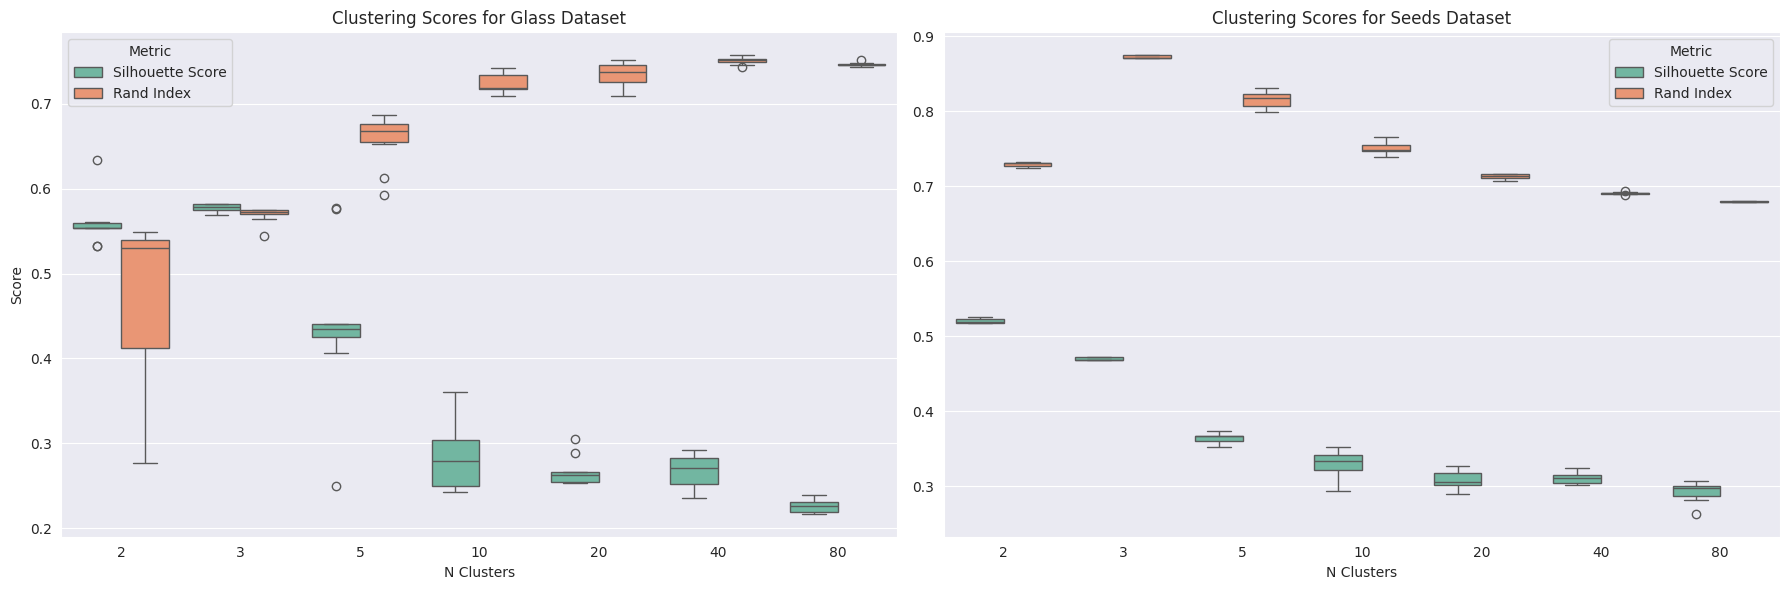

In [286]:
plot_boxplots(df_all, param_col='n_clusters')

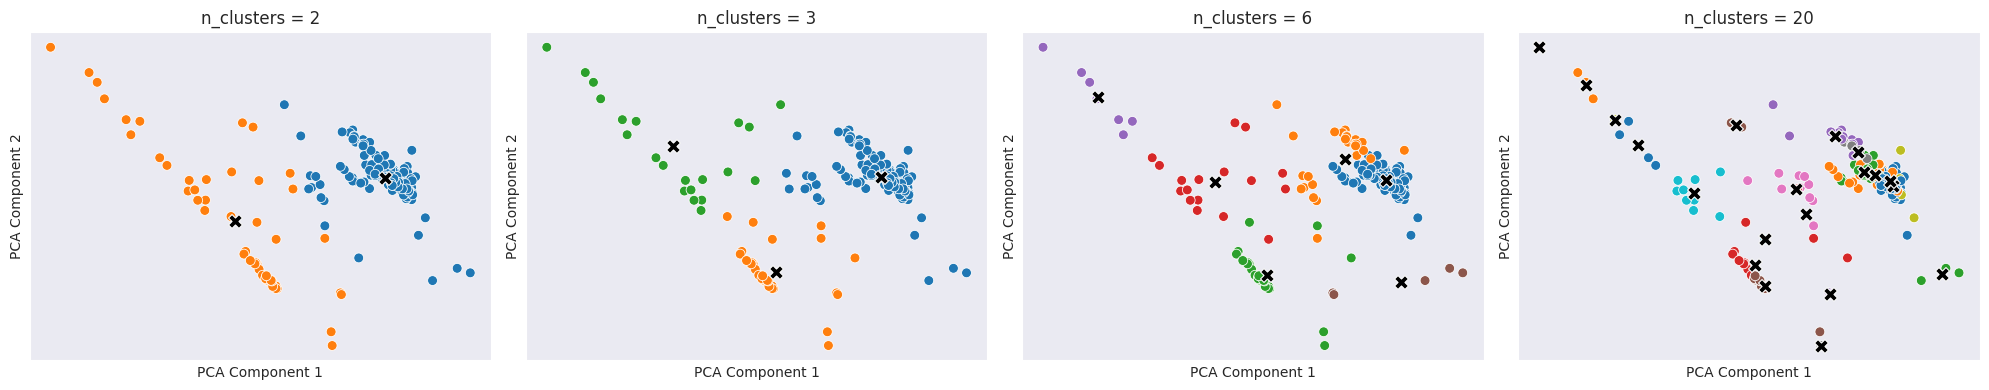

In [338]:
visualize_clustering_param(X_glass, [2, 3, 6, 20])

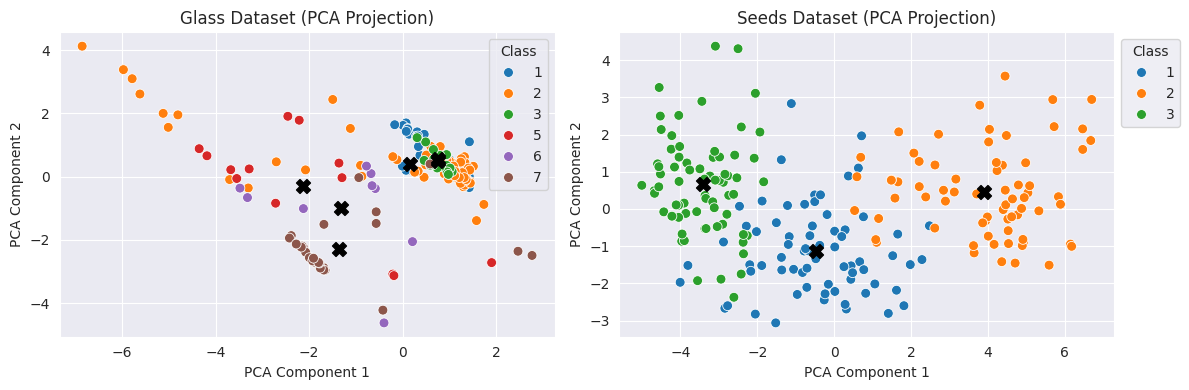

In [315]:
visualize_datasets(X_glass, y_glass, X_seeds, y_seeds)

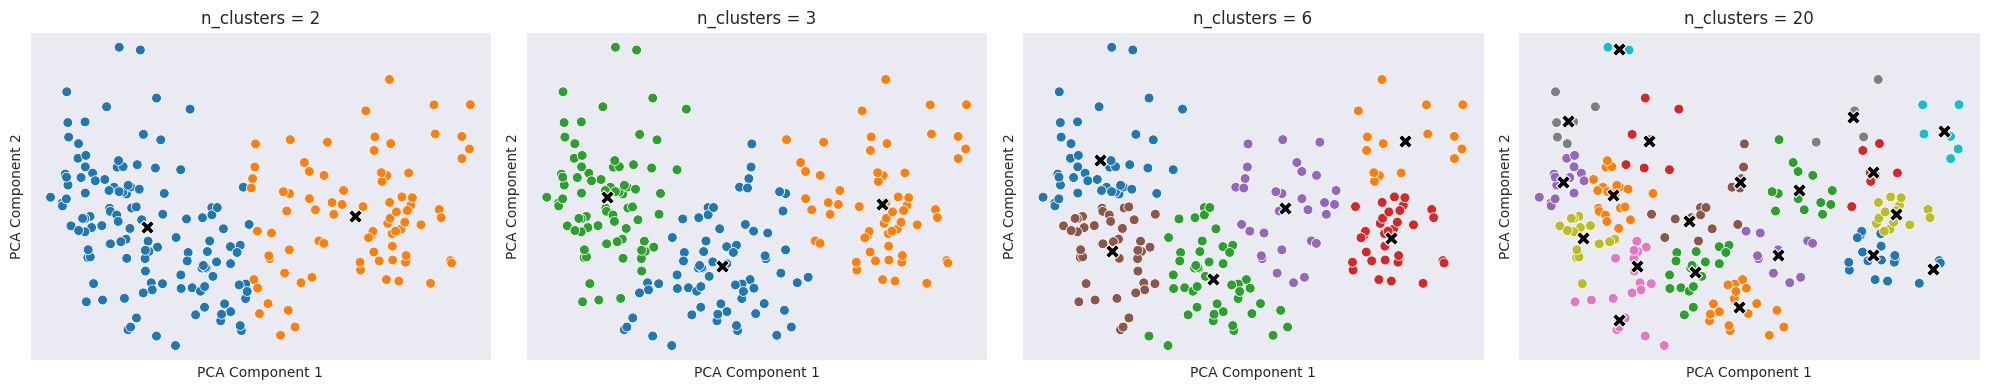

In [72]:
visualize_clustering_param(X_seeds, [2, 3, 6, 20])

#### n_init

In [73]:
n_init = [1, 3, 5, 10, 20, 40]

In [323]:
df_glass = collect_scores(X_glass, y_glass, param_name="n_init", param_values=n_init, dataset_name="Glass", n_runs=n_runs)
df_seeds = collect_scores(X_seeds, y_seeds, param_name="n_init", param_values=n_init, dataset_name="Seeds", n_runs=n_runs)

In [324]:
df_all = pd.concat([df_glass, df_seeds], ignore_index=True)

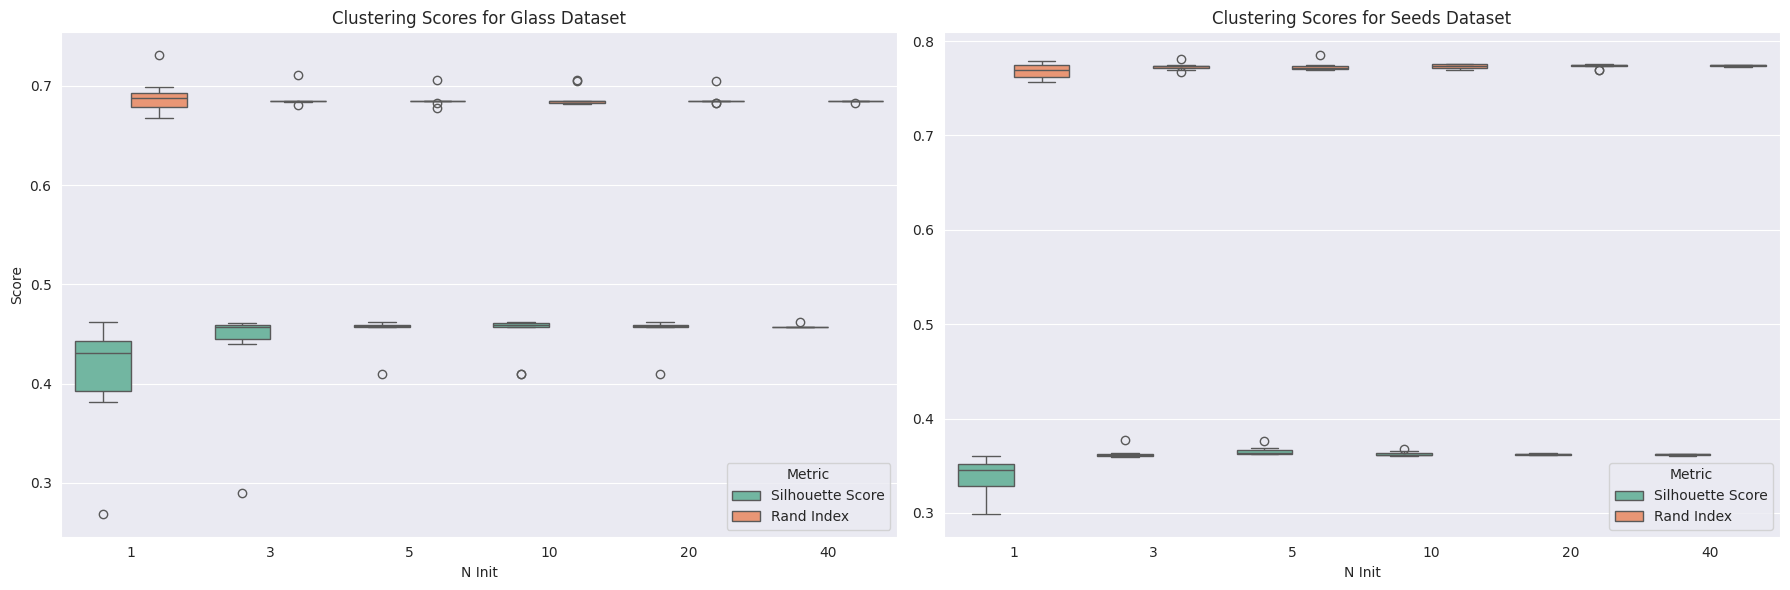

In [325]:
plot_boxplots(df_all, param_col='n_init')

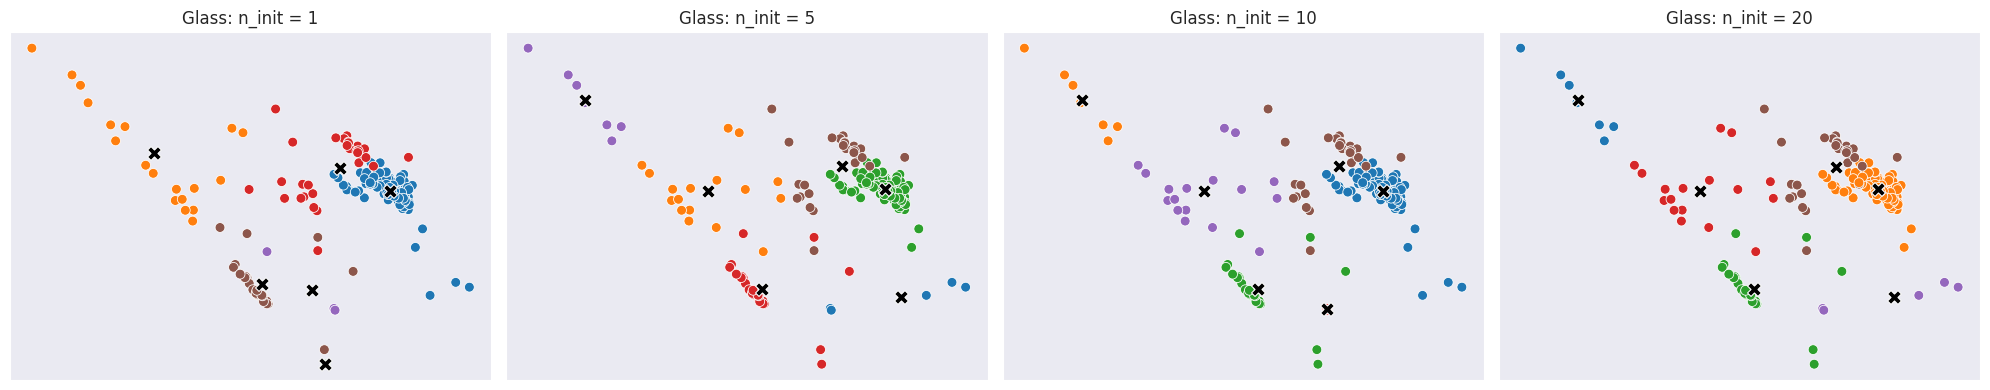

In [349]:
visualize_param_for_dataset(X_glass, param_values=[1, 5, 10, 20], param_name='n_init', n_clusters=6, title_prefix="Glass: ")

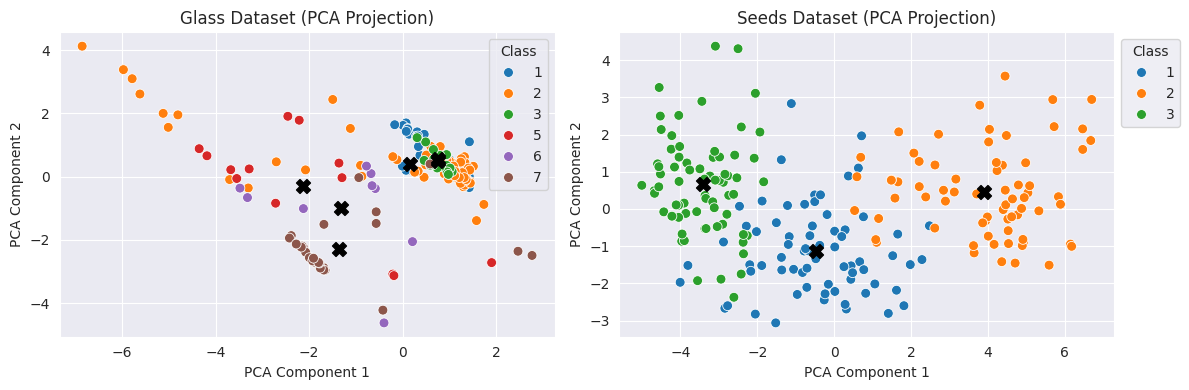

In [343]:
visualize_datasets(X_glass, y_glass, X_seeds, y_seeds)

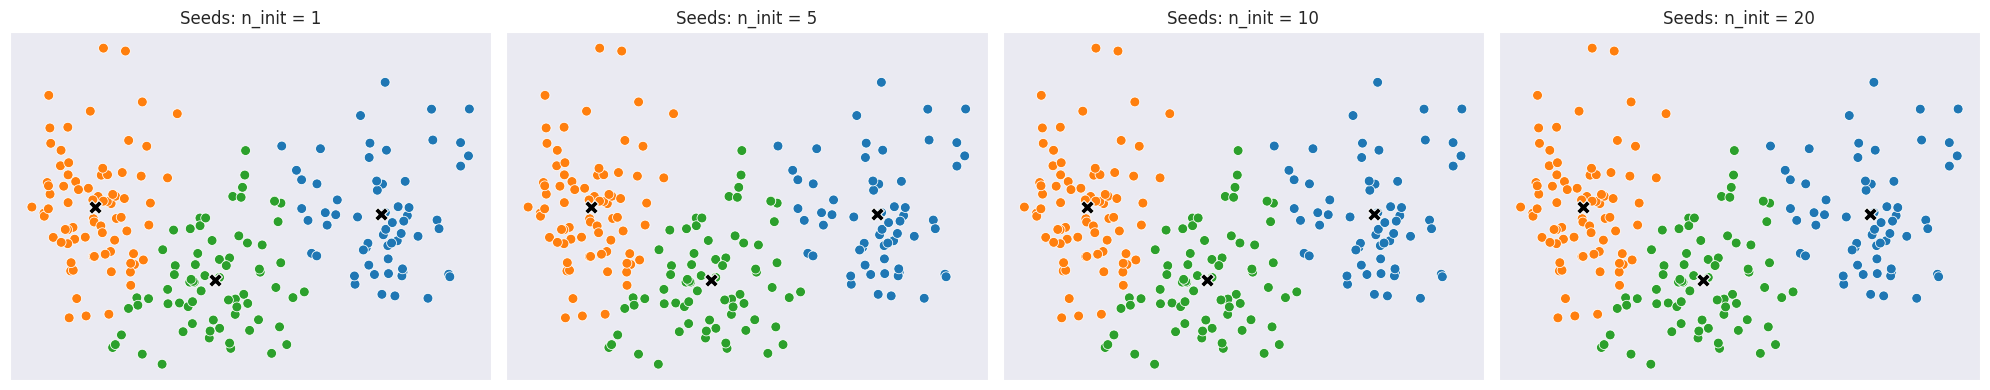

In [345]:
visualize_param_for_dataset(X_seeds, param_values=[1, 5, 10, 20], param_name='n_init', n_clusters=3, title_prefix="Seeds: ")

#### max_iter

In [143]:
max_iter = [1, 2, 3, 5, 7, 10, 20, 40]

In [329]:
df_glass = collect_scores(X_glass, y_glass, param_name="max_iter", param_values=max_iter, dataset_name="Glass", n_runs=n_runs)
df_seeds = collect_scores(X_seeds, y_seeds, param_name="max_iter", param_values=max_iter, dataset_name="Seeds", n_runs=n_runs)

In [330]:
df_all = pd.concat([df_glass, df_seeds], ignore_index=True)

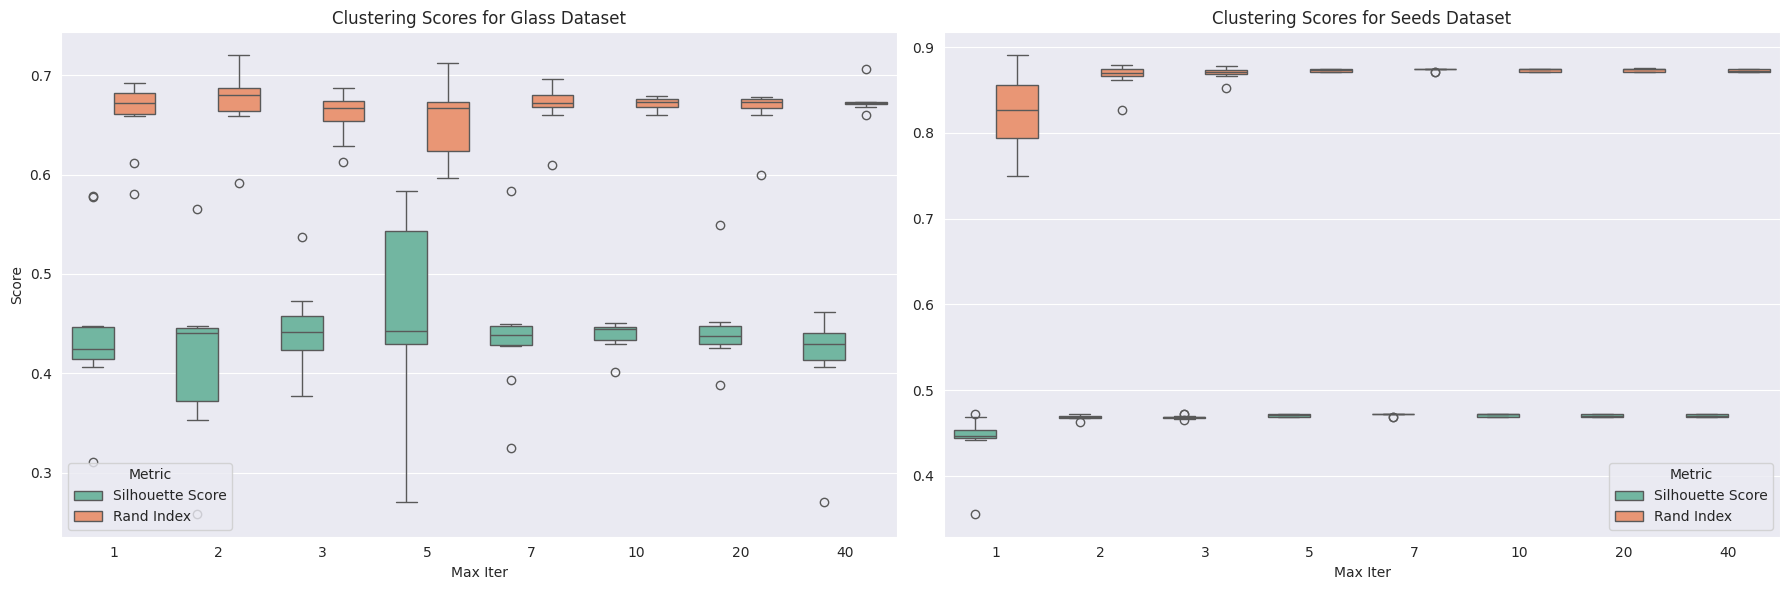

In [331]:
plot_boxplots(df_all, param_col='max_iter')

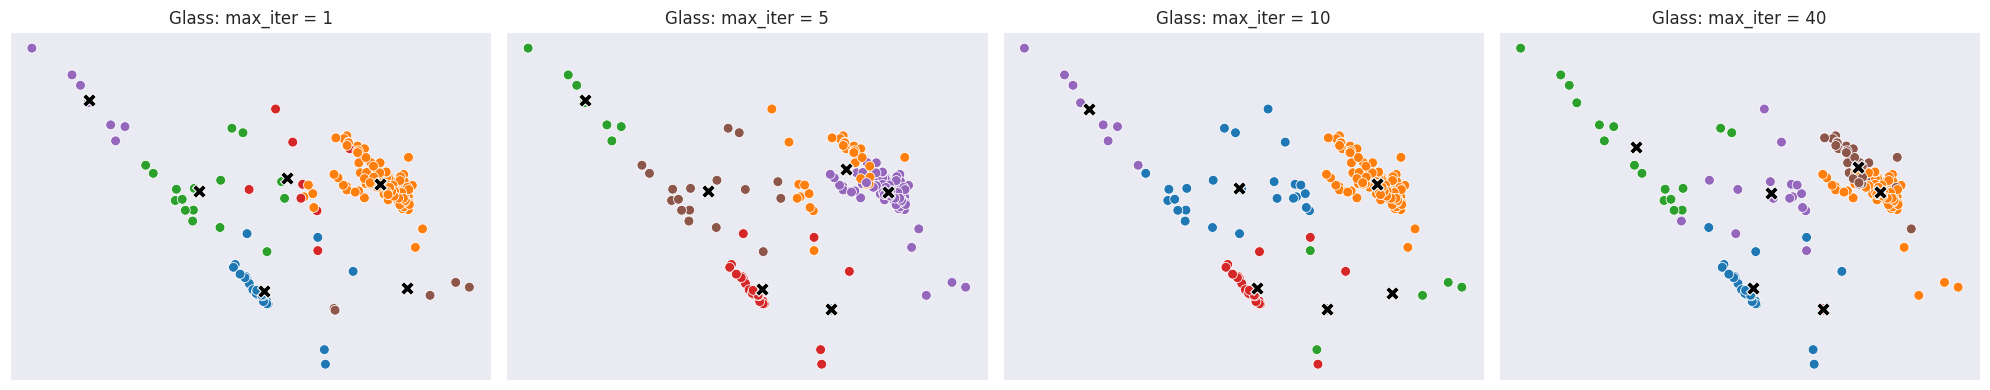

In [336]:
visualize_param_for_dataset(X_glass, param_values=[1, 5, 10, 40], param_name='max_iter', n_clusters=6, title_prefix="Glass: ")

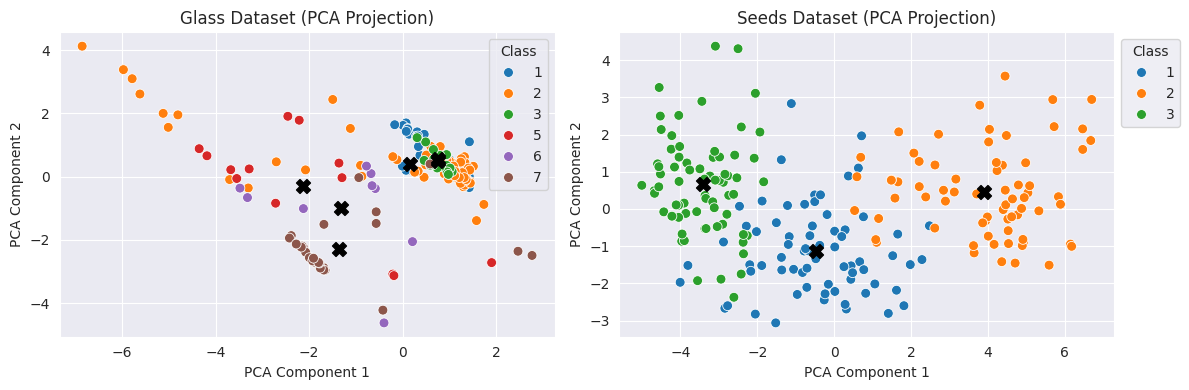

In [334]:
visualize_datasets(X_glass, y_glass, X_seeds, y_seeds)

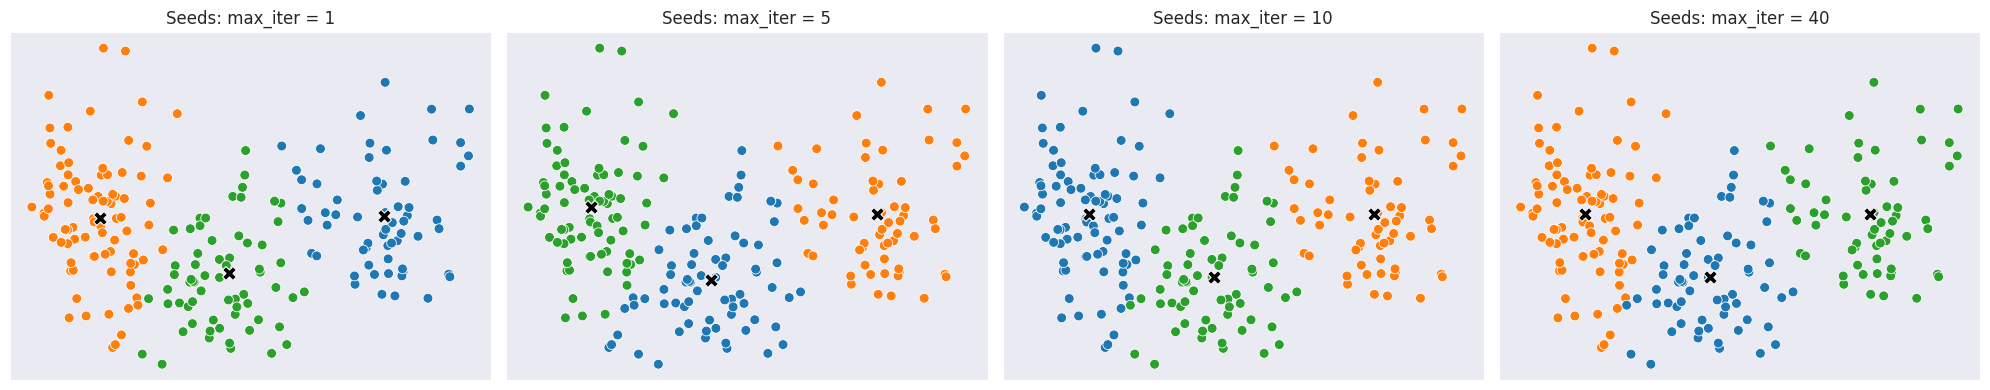

In [335]:
visualize_param_for_dataset(X_seeds, param_values=[1, 5, 10, 40], param_name='max_iter', n_clusters=3, title_prefix="Seeds: ")

### DBSCAN

#### eps

In [403]:
eps = [0.8, 1, 1.2, 1.3, 1.5]

In [404]:
db_silhouette_eps_glass = []
db_rand_index_eps_glass = []

for e in eps:
    db = DBSCAN(eps=e, min_samples=10)
    labels = db.fit_predict(X_glass)
    db_silhouette_eps_glass.append(silhouette_score(X_glass, labels))
    db_rand_index_eps_glass.append(rand_score(y_glass, labels))

In [405]:
db_silhouette_eps_seeds = []
db_rand_index_eps_seeds = []

for e in eps:
    db = DBSCAN(eps=e, min_samples=10)
    labels = db.fit_predict(X_seeds)
    db_silhouette_eps_seeds.append(silhouette_score(X_seeds, labels))
    db_rand_index_eps_seeds.append(rand_score(y_seeds, labels))

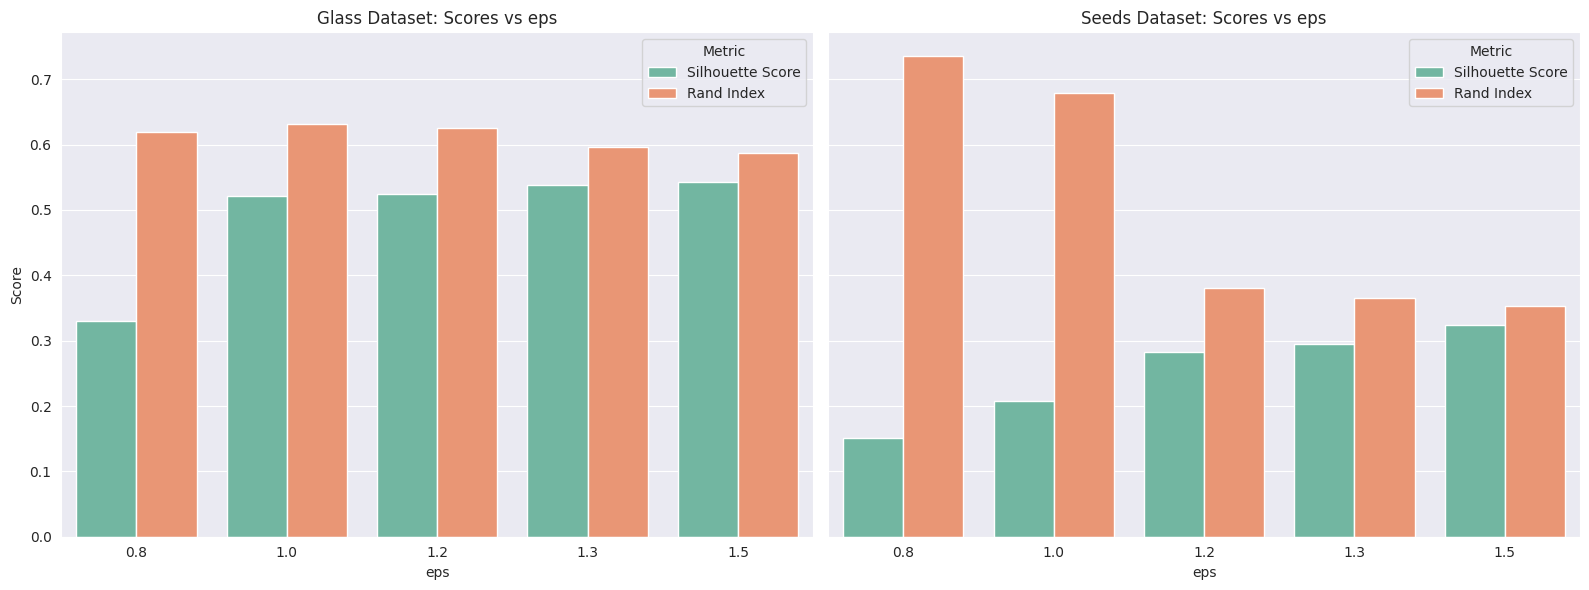

In [406]:
plot_clustering_scores_barplot(
    param_values=eps,
    silhouette_glass=db_silhouette_eps_glass,
    rand_glass=db_rand_index_eps_glass,
    silhouette_seeds=db_silhouette_eps_seeds,
    rand_seeds=db_rand_index_eps_seeds,
    param_name="eps"
)

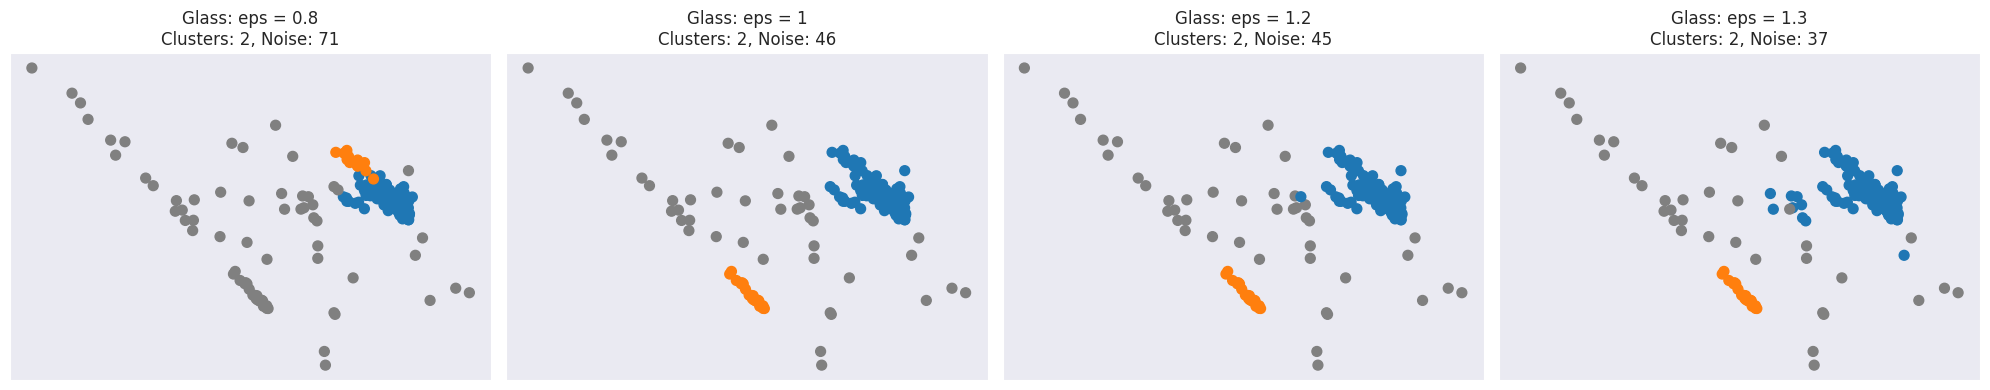

In [407]:
visualize_param_for_dataset_dbscan(X_glass, [0.8, 1, 1.2, 1.3], param_name='eps', title_prefix="Glass: ")

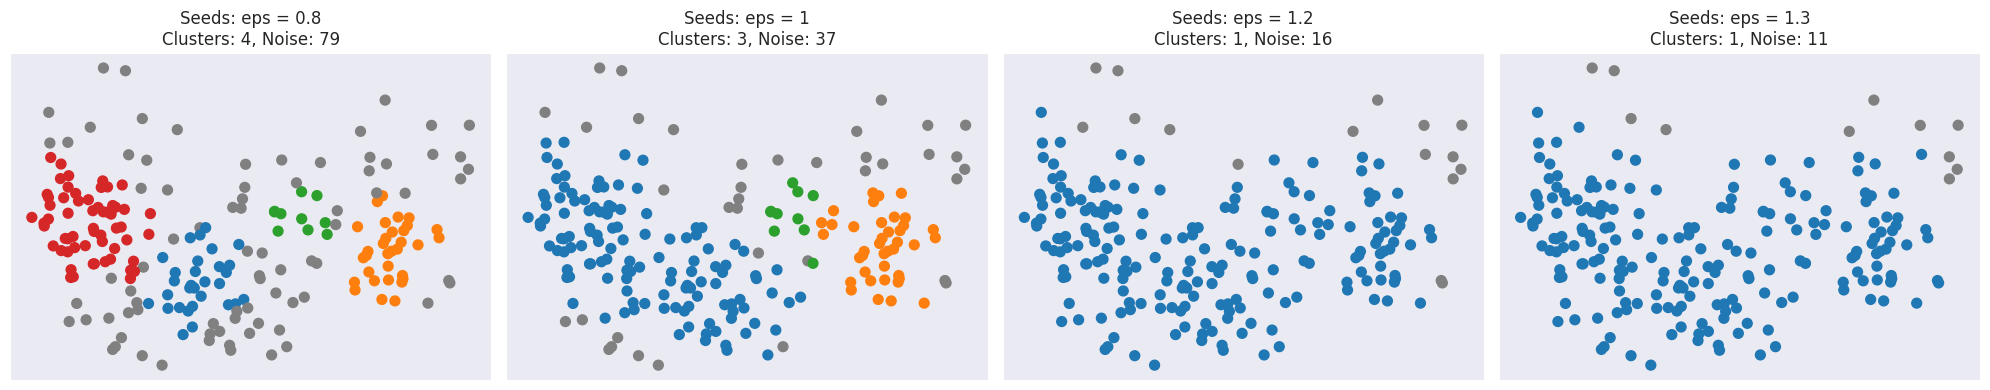

In [408]:
visualize_param_for_dataset_dbscan(X_seeds, [0.8, 1, 1.2, 1.3], param_name='eps', title_prefix="Seeds: ")

#### min_samples

In [433]:
min_samples = [2, 4, 6, 8, 10, 15, 20]

In [434]:
db_silhouette_min_glass = []
db_rand_index_min_glass = []

for m in min_samples:
    db = DBSCAN(eps=1, min_samples=m)
    labels = db.fit_predict(X_glass)
    db_silhouette_min_glass.append(silhouette_score(X_glass, labels))
    db_rand_index_min_glass.append(rand_score(y_glass, labels))

In [435]:
db_silhouette_min_seeds = []
db_rand_index_min_seeds = []
for m in min_samples:
    db = DBSCAN(eps=1, min_samples=m)
    labels = db.fit_predict(X_seeds)
    db_silhouette_min_seeds.append(silhouette_score(X_seeds, labels))
    db_rand_index_min_seeds.append(rand_score(y_seeds, labels))

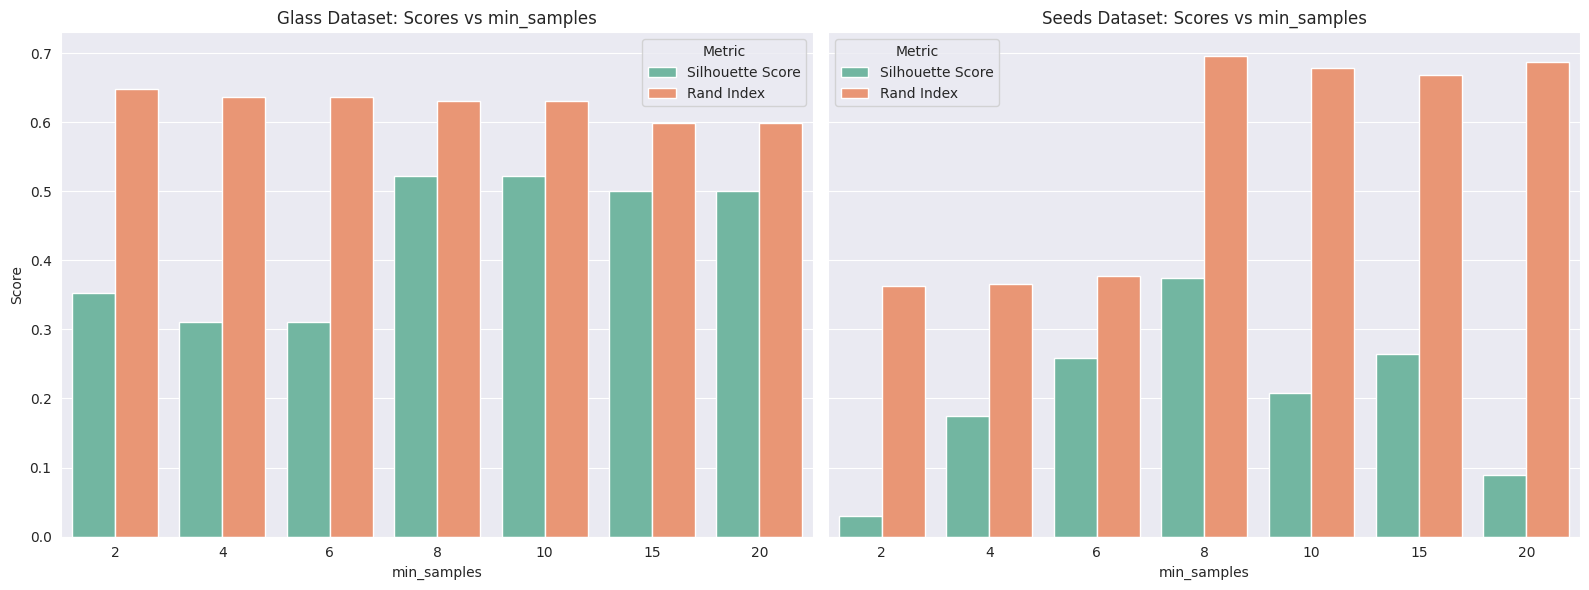

In [438]:
plot_clustering_scores_barplot(
    param_values=min_samples,
    silhouette_glass=db_silhouette_min_glass,
    rand_glass=db_rand_index_min_glass,
    silhouette_seeds=db_silhouette_min_seeds,
    rand_seeds=db_rand_index_min_seeds,
    param_name="min_samples"
)

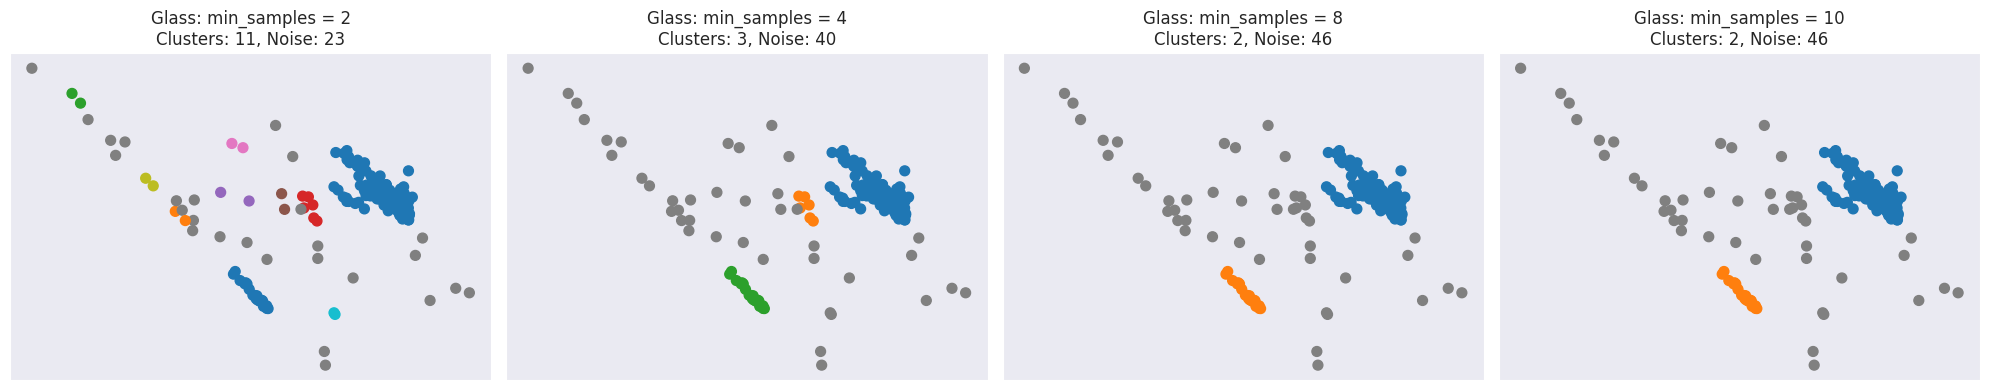

In [428]:
visualize_param_for_dataset_dbscan(X_glass, [2, 4, 8, 10], param_name='min_samples', title_prefix="Glass: ")

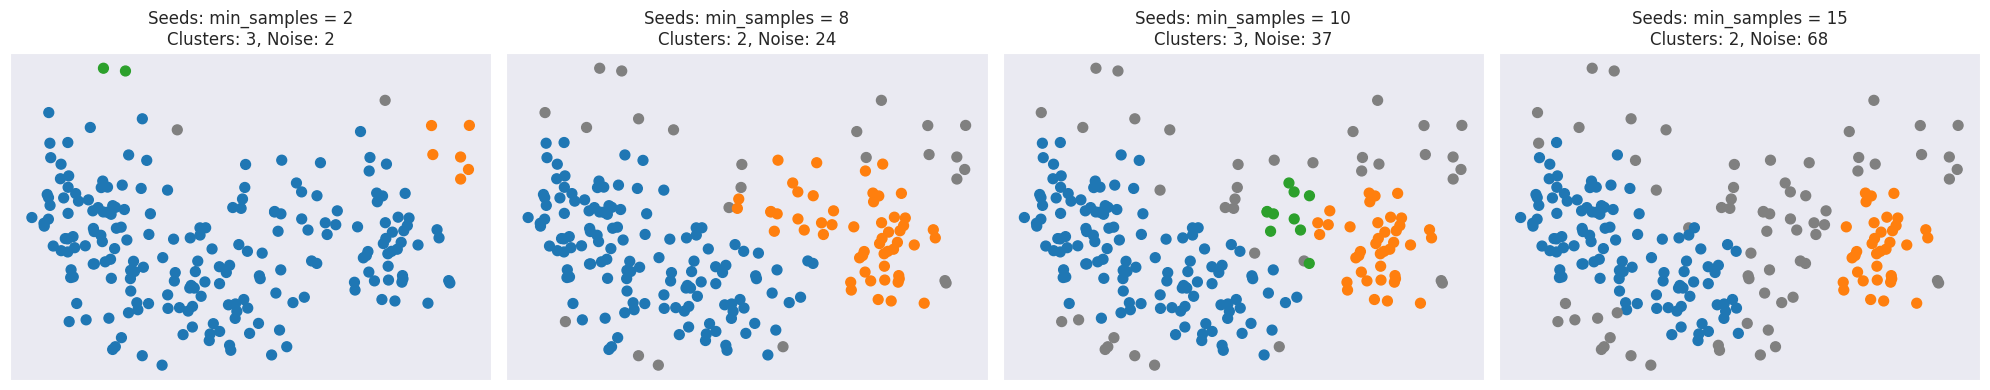

In [432]:
visualize_param_for_dataset_dbscan(X_seeds, [2, 8, 10, 15], param_name='min_samples', title_prefix="Seeds: ")

#### metric

In [462]:
metric = ['euclidean', 'manhattan', 'chebyshev']

In [463]:
db_silhouette_metric_glass = []
db_rand_index_metric_glass = []

for m in metric:
    db = DBSCAN(eps=1, min_samples=4, metric=m)
    labels = db.fit_predict(X_glass)
    db_silhouette_metric_glass.append(silhouette_score(X_glass, labels))
    db_rand_index_metric_glass.append(rand_score(y_glass, labels))

In [464]:
db_silhouette_metric_seeds = []
db_rand_index_metric_seeds = []
for m in metric:
    db = DBSCAN(eps=1, min_samples=10, metric=m)
    labels = db.fit_predict(X_seeds)
    db_silhouette_metric_seeds.append(silhouette_score(X_seeds, labels))
    db_rand_index_metric_seeds.append(rand_score(y_seeds, labels))

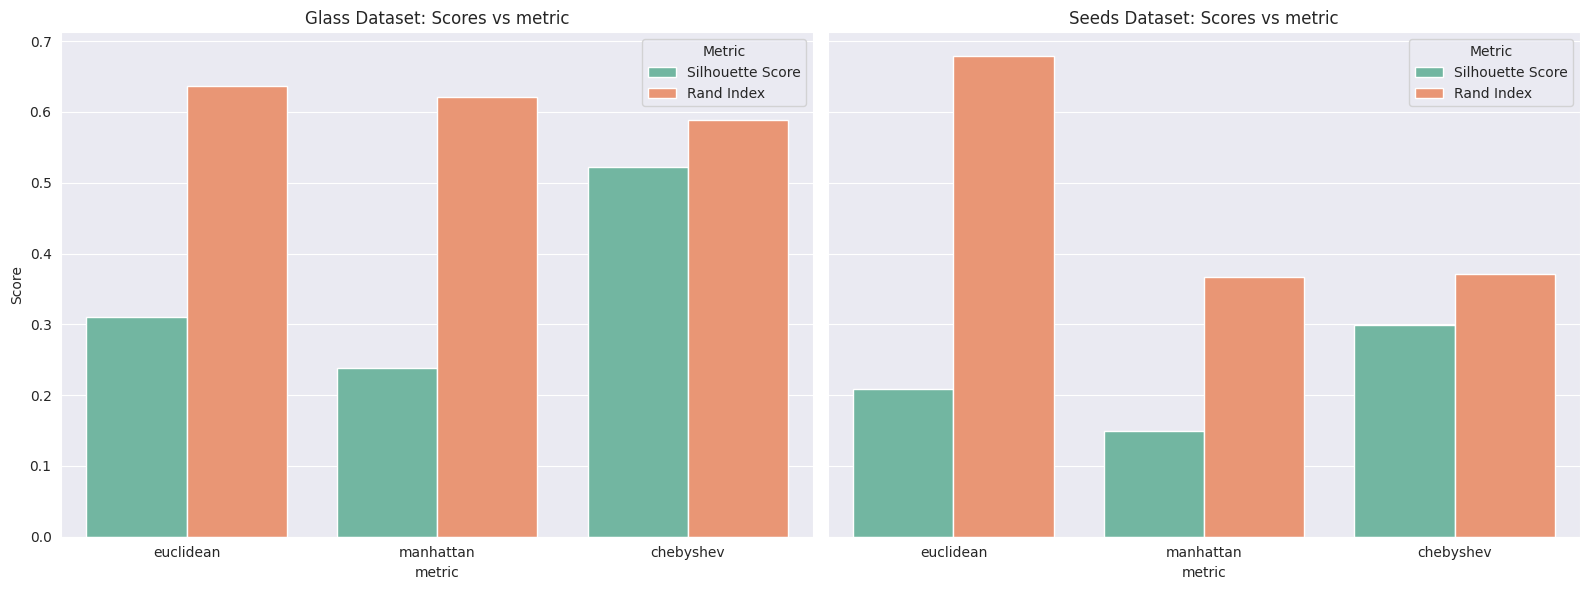

In [465]:
plot_clustering_scores_barplot(
    param_values=metric,
    silhouette_glass=db_silhouette_metric_glass,
    rand_glass=db_rand_index_metric_glass,
    silhouette_seeds=db_silhouette_metric_seeds,
    rand_seeds=db_rand_index_metric_seeds,
    param_name="metric"
)

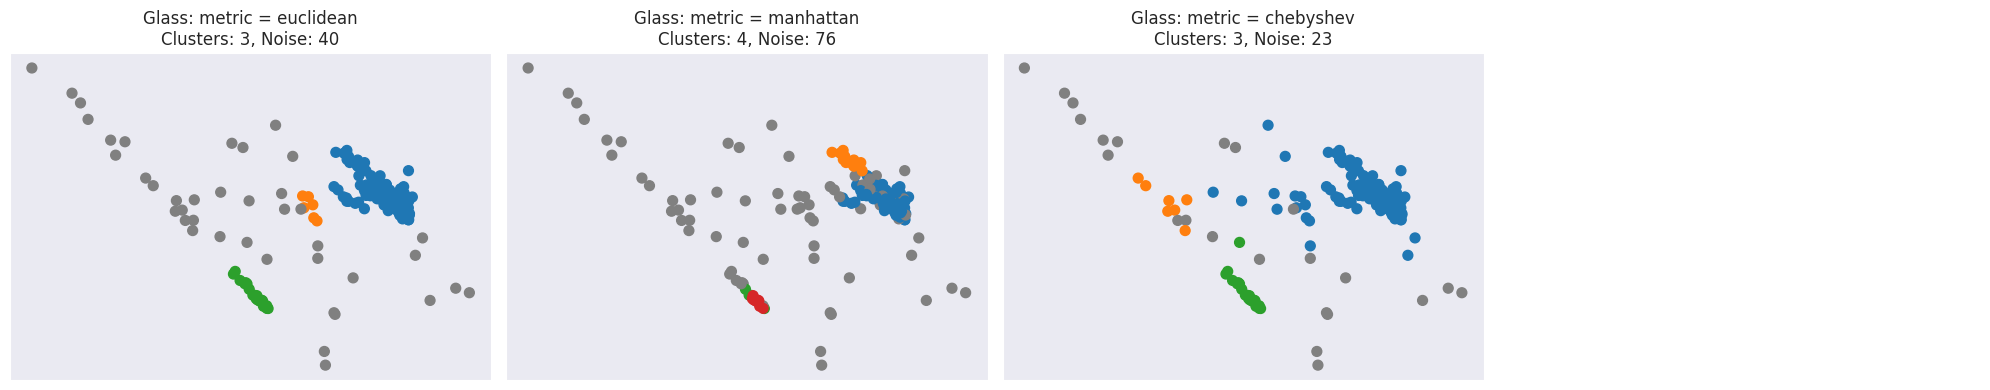

In [483]:
visualize_param_for_dataset_dbscan(X_glass, ['euclidean', 'manhattan', 'chebyshev'], param_name='metric', title_prefix="Glass: ")

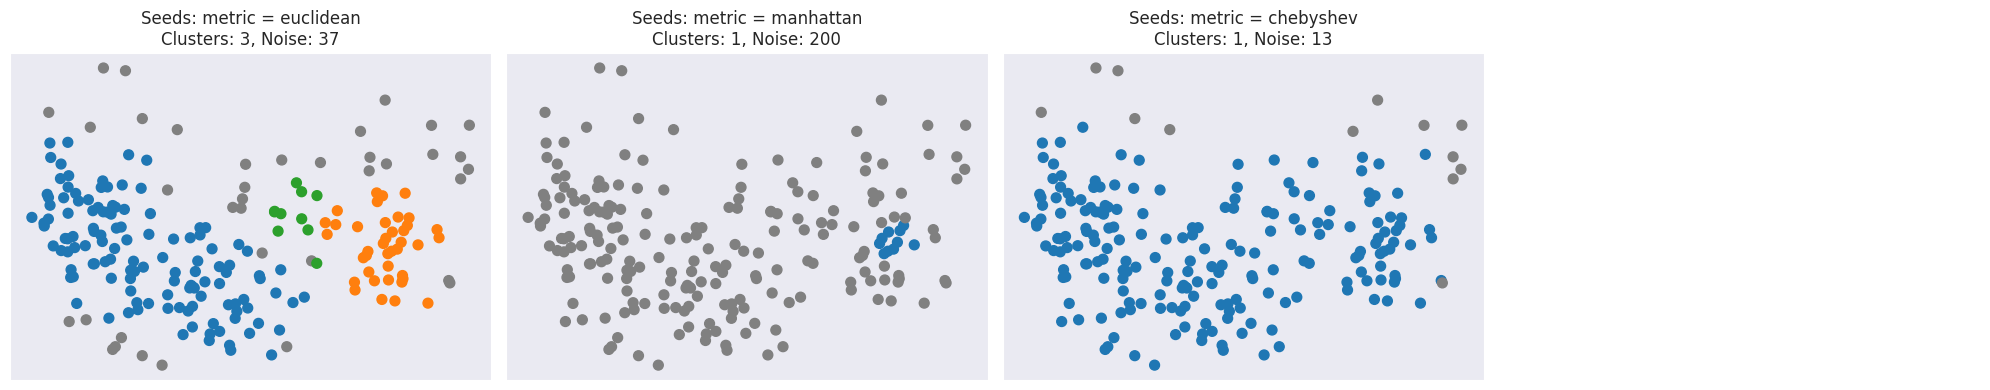

In [482]:
visualize_param_for_dataset_dbscan(X_seeds, ['euclidean', 'manhattan', 'chebyshev'], param_name='metric', title_prefix="Seeds: ")